In [ ]:
import pandas as pd
import datetime
path = '/content/prices/'

df_list = []
names = []
for file_name in os.listdir(path):
  if file_name[0] == '.':
      continue
  name = file_name.split(".")[0]
  df = pd.read_csv(path + file_name)
  df[["Date", name]] = df [['Date', 'Close']]
  df = df[['Date', name]]
  names.append(name)
  #if df['Date'].iloc[0] >= "2019-11-27": #datetime.date(2019, 11, 27):
  #    df_list.append(df)
  df_list.append(df)

In [ ]:
dfs = [df.iloc[-1002:-2, :].set_index("Date") for df in df_list if len(df) > 1002]
print(len(dfs))
result = pd.concat(dfs, axis=1, ignore_index=False).bfill().iloc[:-12, :]
result

In [ ]:
#result = pd.concat(dfs, axis=1, ignore_index=False).bfill().iloc[:-12, :]
#result.columns = ["Date"] + names
differences = result.max() - result.min()

# Calculate the mean of each column
means = result.mean()

# Calculate the relative variation for each column
relative_variation = differences / means

# Create a new dataframe that only includes columns with a relative variation greater than 10%
result_filtered = result.loc[:, relative_variation > 0.1]

In [350]:

result_filtered.to_csv("crypto_2019-11-25_2022-08-20")
crypto_prices = pd.read_csv("/content/crypto_2019-11-25_2022-08-20")
df['Date'] = pd.to_datetime(crypto_prices['Date'])
df = df.sort_values(by='Date')


In [ ]:
stock_prices = pd.read_csv("/content/sp500_stocks.csv")

In [351]:
df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2019-11-25,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2019-11-26,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2019-11-27,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2019-11-28,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2019-11-29,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...,...,...
1637763,NaT,ZTS,156.639999,156.639999,157.529999,155.190002,156.000000,2367800.0
1637764,NaT,ZTS,157.419998,157.419998,157.910004,152.399994,154.110001,1946100.0
1637765,NaT,ZTS,155.330002,155.330002,156.669998,154.580002,155.630005,2087400.0
1637766,NaT,ZTS,153.050003,153.050003,155.500000,152.089996,154.220001,1964800.0


In [ ]:
if result_filtered.isnull().any().any():
    print("The dataframe contains NaN values.")
else:
    print("The dataframe does not contain any NaN values.")

The dataframe does not contain any NaN values.


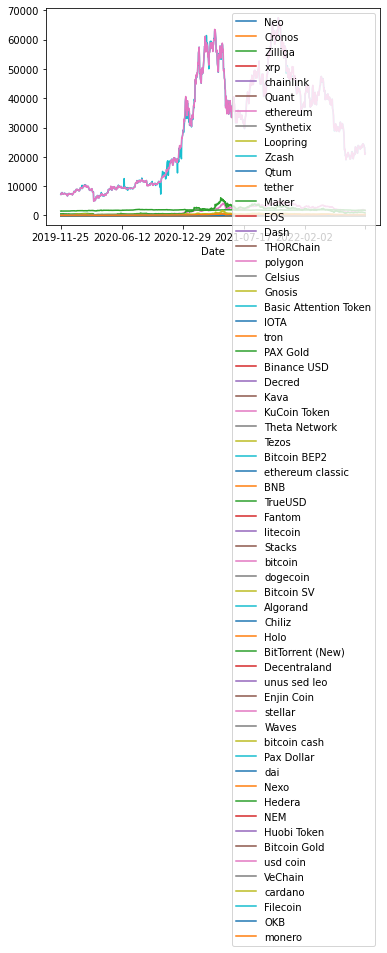

In [ ]:
result.plot()

In [ ]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [ ]:
import random

df = pd.read_csv('/content/all_stocks_5yr.csv')a
names = df['Name'].unique()
sampled_names = random.sample(list(names), 100)
result_stock = df[["date"]]
for name in sampled_names:
  result_stock = pd.concat((result_stock, df[df["Name"] == name]["close"]) , axis=1, ignore_index=False)#result_stock[name] = df[df["Name"] == name]["close"]
result_stock

In [ ]:
result_stock

0                                              2013-02-08
1                                              2013-02-11
2                                              2013-02-12
3                                              2013-02-13
4                                              2013-02-14
                              ...                        
JNPR    317780    21.84
317781    21.71
317782    21.6...
ABT     6295    34.41
6296    34.26
6297    34.30
6298...
KMB     325989     90.90
325990     90.40
325991     8...
SRE     518296     76.14
518297     75.76
518298     7...
HCN     267650    62.30
267651    62.36
267652    62.7...
Name: date, Length: 619140, dtype: object

In [ ]:
import csv

# read in the CSV file
with open('/content/all_stocks_5yr.csv', 'r') as file:
    reader = csv.reader(file)
    
    # create a dictionary to store the data for each name
    data = {}
    
    # skip the header row
    next(reader)
    
    # loop through the rows in the file
    for row in reader:
        date = row[0]
        name = row[6]
        close = row[4]
        
        # add the close price to the data for the given name
        if name in data:
            data[name]['closes'].append(close)
        else:
            data[name] = {'closes': [close]}

# print the data for each name
for name, info in data.items():
    print(f"Name: {name}")
    print(f"Closes: {info['closes']}")






In [ ]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [ ]:
import pandas as pd

# read in the CSV file using pandas
df = pd.read_csv('/content/sp500_stocks.csv')

# create a new DataFrame with only the columns you want
new_df = df[['Date', 'Symbol', 'Close']]

# group the data by name and create a new column with the list of closes for each name
new_df = new_df.pivot(index='Date', columns='Symbol', values='Close').iloc[-1075:-75,:]
#new_df.to_csv("sp500_2016-12-22_2022-08-22")
# print the DataFrame
print(new_df)

Symbol               A        AAL         AAP        AAPL        ABBV  \
Date                                                                    
2018-08-31   67.540001  40.480000  164.029999   56.907501   95.980003   
2018-09-04   67.269997  40.770000  169.479996   57.090000   94.559998   
2018-09-05   66.959999  39.669998  167.000000   56.717499   95.190002   
2018-09-06   67.360001  38.480000  167.220001   55.775002   93.739998   
2018-09-07   67.400002  38.430000  167.279999   55.325001   94.169998   
...                ...        ...         ...         ...         ...   
2022-08-16  132.770004  15.500000  209.600006  173.029999  142.550003   
2022-08-17  142.289993  14.960000  209.979996  174.550003  141.440002   
2022-08-18  139.970001  14.840000  207.490005  174.149994  141.289993   
2022-08-19  137.619995  14.170000  207.020004  171.520004  141.850006   
2022-08-22  133.940002  13.710000  198.479996  167.570007  140.339996   

Symbol             ABC        ABMD         ABT    

In [380]:
import warnings
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
#warnings.filterwarnings("ignore")

In [ ]:
#@title Helper Functions
def returns(S:pd.DataFrame) -> pd.DataFrame:
  X = S / S.shift(1).fillna(method="ffill")
  for name, s in X.iteritems():
      X[name].iloc[s.index.get_loc(s.first_valid_index()) -1] = 1.0
  return X-1

def scale_eta(eta: pd.DataFrame) -> pd.DataFrame:
  eta_ = eta.copy()
  scaler = StandardScaler()
  scaler.fit(eta_)
  eta_tilde = scaler.transform(eta_)
  eta_tilde = pd.DataFrame(eta_tilde)
  return eta_tilde

def filter_out_smaller_lambda(eta: pd.DataFrame, lambda_:float) -> pd.DataFrame:
  eta_ = eta.copy().dropna()
  out = eta_[eta_ > lambda_].fillna(0).copy() if lambda_ > 0 else eta_[eta_ < lambda_].fillna(0).copy()
  return out # eta_[eta_ > lambda_].fillna(0).copy()

def filter_indices(indices:pd.Series, column:pd.Series) -> pd.Series:
  return column[column.index.isin(indices)]

In [302]:
closes_crypto = pd.read_csv("/content/crypto_2019-11-25_2022-08-20").iloc[:, 1:].reset_index().drop(columns=["index"])
coins = ["ethereum", "bitcoin", "cardano", "xrp", "dogecoin", "polygon", "IOTA"]
closes_crypto_selection = closes_crypto[coins]
closes_stock = pd.read_csv("/content/sp500_2016-12-22_2022-08-22").iloc[-690:, 1:].reset_index()

random_sample = random.sample(list(range(closes_stock.shape[1])), 45)
closes_stock = closes_stock.iloc[:, random_sample]

In [346]:
closes_crypto 


,Neo,Cronos,Zilliqa,xrp,chainlink,Quant,ethereum,Synthetix,Loopring,Zcash,...,Nexo,Hedera,NEM,Huobi Token,Bitcoin Gold,VeChain,cardano,Filecoin,OKB,monero
0,9.133552,0.027750,0.004824,0.22072,2.24,5.610807,147.61,1.399770,0.022434,27.354353,...,0.086187,0.024146,0.035566,2.469481,6.202446,0.005895,0.0367,4.827138,2.077294,51.216
1,9.343734,0.027680,0.005146,0.22072,2.24,5.810770,147.61,1.369104,0.023242,28.501516,...,0.091371,0.024528,0.036111,2.594056,6.274095,0.006381,0.0367,3.812877,2.172753,51.216
2,9.491991,0.028306,0.005152,0.22404,2.22,6.187359,152.70,1.425371,0.023205,28.552610,...,0.096010,0.024320,0.037002,2.628788,6.517335,0.006541,0.0390,3.848392,2.246604,55.794
3,9.319755,0.027409,0.005374,0.22311,2.27,6.042891,151.07,1.446327,0.024065,28.679956,...,0.093925,0.025187,0.036133,2.672013,6.578992,0.006379,0.0390,4.159468,2.310750,53.973
4,9.764477,0.028357,0.005464,0.23004,2.34,6.117462,154.55,1.343243,0.025156,29.461351,...,0.096860,0.026047,0.037748,2.793883,6.762849,0.006493,0.0413,4.184776,2.345467,55.840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11.165107,0.150490,0.045185,0.37696,8.45,116.130356,1876.70,3.684468,0.455562,76.020714,...,0.959172,0.076931,0.052059,5.128102,29.192574,0.030723,0.5571,8.427291,21.056555,169.542
996,10.930410,0.143395,0.042960,0.37957,8.06,109.605919,1834.18,3.490866,0.419548,74.042999,...,0.927976,0.073466,0.050339,4.876587,28.691019,0.029202,0.5382,8.176953,20.664242,168.845
997,10.445977,0.140867,0.041554,0.37024,7.64,109.609200,1846.51,3.261320,0.400099,70.320618,...,0.924063,0.070693,0.048658,4.600947,28.340860,0.028229,0.5119,7.490127,20.611071,161.111
998,9.541813,0.122315,0.036956,0.33459,6.90,99.098099,1609.48,2.803333,0.373348,62.324978,...,0.832481,0.065346,0.045229,4.346759,23.792530,0.025733,0.4502,6.472313,18.083649,142.515


In [311]:
eta_crypto = returns(closes_crypto)
eta_crypto_selection = returns(closes_crypto_selection)
eta_stock = returns(closes_stock)

print(eta_crypto.isin([np.inf]).any().any())
print(eta_stock.isin([np.inf]).any().any())

False
False


In [314]:
eta_crypto

,Neo,Cronos,Zilliqa,xrp,chainlink,Quant,ethereum,Synthetix,Loopring,Zcash,...,Nexo,Hedera,NEM,Huobi Token,Bitcoin Gold,VeChain,cardano,Filecoin,OKB,monero
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.023012,-0.002523,0.066750,0.000000,0.000000,0.035639,0.000000,-0.021908,0.036017,0.041937,...,0.060148,0.015820,0.015324,0.050446,0.011552,0.082443,0.000000,-0.210116,0.045954,0.000000
2,0.015867,0.022616,0.001166,0.015042,-0.008929,0.064809,0.034483,0.041098,-0.001592,0.001793,...,0.050771,-0.008480,0.024674,0.013389,0.038769,0.025074,0.062670,0.009315,0.033990,0.089386
3,-0.018145,-0.031689,0.043090,-0.004151,0.022523,-0.023349,-0.010675,0.014702,0.037061,0.004460,...,-0.021716,0.035650,-0.023485,0.016443,0.009460,-0.024767,0.000000,0.080833,0.028552,-0.032638
4,0.047718,0.034587,0.016747,0.031061,0.030837,0.012340,0.023036,-0.071273,0.045336,0.027245,...,0.031248,0.034145,0.044696,0.045610,0.027946,0.017871,0.058974,0.006084,0.015024,0.034591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.009419,-0.006043,-0.014160,0.004932,-0.023121,0.020138,-0.012393,-0.003677,-0.033110,0.028530,...,-0.030997,-0.011703,-0.020766,-0.024941,-0.019515,-0.022463,0.013093,-0.005504,-0.027141,0.038491
996,-0.021021,-0.047146,-0.049242,0.006924,-0.046154,-0.056182,-0.022657,-0.052545,-0.079054,-0.026015,...,-0.032524,-0.045040,-0.033039,-0.049046,-0.017181,-0.049507,-0.033926,-0.029706,-0.018631,-0.004111
997,-0.044320,-0.017630,-0.032728,-0.024580,-0.052109,0.000030,0.006722,-0.065756,-0.046357,-0.050273,...,-0.004217,-0.037745,-0.033394,-0.056523,-0.012204,-0.033320,-0.048867,-0.083995,-0.002573,-0.045805
998,-0.086556,-0.131699,-0.110651,-0.096289,-0.096859,-0.095896,-0.128366,-0.140430,-0.066861,-0.113703,...,-0.099108,-0.075637,-0.070471,-0.055247,-0.160487,-0.088420,-0.120531,-0.135887,-0.122624,-0.115424


#Extreme event correlations

##Correlations conditioned on large market moves

The simplest idea is to measure correlations between stocks conditioned on certain extreme events, for example an extreme market return. It is indeed commonly believed that crosscorrelations between stocks increase in such "high-volatility" periods. Introducing the return of stock $i, \eta_{i}$, and the return of the market $\eta_{m}$ simply defined as the average of all $\eta_{i}$ 's, a natural measure of these correlations is given by the following coefficient:

$$\rho_{>}(\lambda)=\frac{\frac{1}{N^{2}} \sum_{i, j}\left(\left\langle\eta_{i} \eta_{j}\right\rangle_{>\lambda}-\left\langle\eta_{i}\right\rangle_{>\lambda}\left\langle\eta_{j}\right\rangle_{>\lambda}\right)}{\frac{1}{N} \sum_{i}\left(\left\langle\eta_{i}^{2}\right\rangle_{>\lambda}-\left\langle\eta_{i}\right\rangle_{>\lambda}^{2}\right)}$$

where the subscript $>\lambda$ indicates that the averaging is restricted to market returns $\eta_{m}$ in absolute value larger than a certain $\lambda$. For $\lambda=0$ the conditioning disappears. Note that the quantity $\rho_{>}$is the average covariance divided by the average variance, and therefore differs from the average correlation coefficient. The two objects however behave very similarly with $\lambda$, and the theoretical discussion is much easier in terms of $\rho_{>}$.

In a first approximation, the distribution of individual stocks returns can be taken to be symmetrical (see Section 6.3.2), leading $\left\langle\eta_{i}\right\rangle_{>\lambda} \approx 0$. Using the fact that $\eta_{m}=\sum_{i} \eta_{i} / N$, the above equation can be transformed into:

$$\rho_{>}(\lambda) \approx \frac{\sigma_{m}^{2}(\lambda)}{\frac{1}{N} \sum_{i=1}^{N} \sigma_{i}^{2}(\lambda)}$$,

where $\sigma_{m}^{2}(\lambda)$ is the market volatility conditioned to market returns in absolute value larger than $\lambda$, and $\sigma_{i}^{2}(\lambda)=\left\langle r_{i}^{2}\right\rangle_{>\lambda}$.

Now, assume the following decomposition to hold:

$$
\eta_{i}(t)=\beta_{i} \eta_{m}(t)+\epsilon_{i}(t),
$$

where $\beta_{i}$ are fixed, time independent coefficients such that $\sum_{i} \beta_{i} / N=1$, and the $\epsilon_{i}$ are uncorrelated with the market and are the so-called idiosyncratic parts, or residuals. (The onefactor model would correspond to the case where all idiosyncracies are uncorrelated, which we do not need to assume here.) Then one obtains for the average conditional correlation $\rho_{>}(\lambda)$ :

$$\rho_{>}(\lambda)=\frac{\sigma_{m}^{2}(\lambda)}{\left(\frac{1}{N} \sum_{i=1}^{N} \beta_{i}^{2}\right) \sigma_{m}^{2}(\lambda)+\frac{1}{N} \sum_{i=1}^{N} \sigma_{\epsilon_{i}}^{2}}$$.

The quantity $\sigma_{m}^{2}(\lambda)$ is obviously an increasing function of $\lambda$. If the residual volatilities $\sigma_{\epsilon_{i}}^{2}$ are independent of $\eta_{m}$ (and therefore of $\lambda$ ) then the coefficient $\rho_{>}(\lambda)$ is an increasing function of $\lambda$, see Fig. 11.1. 

![](https://cdn.mathpix.com/cropped/2022_12_08_1b403185452beeedae75g-03.jpg?height=550&width=800&top_left_y=227&top_left_x=361)

Fig. 11.1. Correlation measure $\rho_{>}(\lambda)$ conditional to the absolute market return to be larger than $\lambda$, both for the empirical data and the one-factor model. Note that both show a similar apparent increase of correlations with $\lambda$. This effect is actually overestimated by the one-factor model with fixed residual volatilities. $\lambda$ is in percents.

Equation (11.4) naturally predicts an increase of the correlations (as measured by $\rho_{>}(\lambda)$ ) in high volatility periods. This conclusion is quite general: the very fact of conditioning the correlation on large market returns leads to an increase of the measured correlation, even if the true structure of correlations is strictly time independent. Equation (11.4) actually even overestimates the correlations for large $\lambda$, as shown in Fig. 11.1. This overestimation can be understood qualitatively as a result of neglecting the positive correlation between the amplitude of the market return $\left|r_{m}\right|$ and the residual volatilities $\sigma_{\epsilon_{i}}$, which we discuss in more details in Section 11.2.1 below in terms of the 'variety'. For large values of $\lambda, \sigma_{\epsilon_{i}}$ is indeed found to be larger than its average value. From Eq. (11.4), this effect lowers the correlation $\rho_{>}(\lambda)$ for a given value of $\sigma_{m}^{2}(\lambda)$.

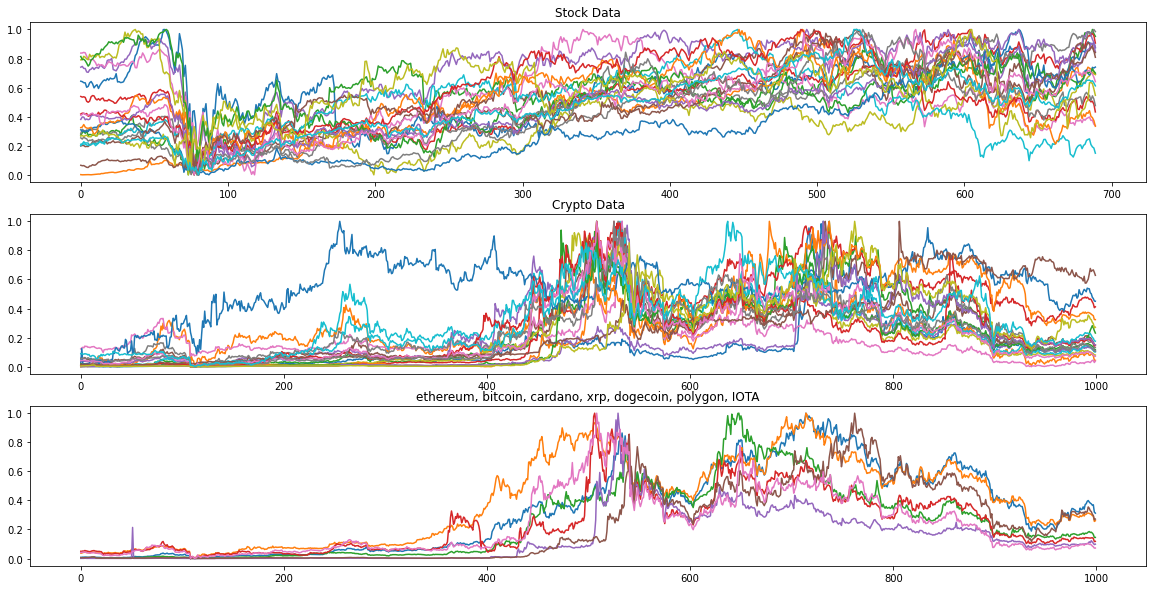

In [310]:
#@title Plot Data
def plot_prices(stock:pd.DataFrame, crypto:pd.DataFrame, crypto2:pd.DataFrame, amount:int, scale:bool=True) -> None:
  random_sample = random.sample(list(range(45)), amount)
  if scale:
    scaler = MinMaxScaler()
    closes_stock = scaler.fit_transform(stock)
    closes_crypto = scaler.fit_transform(crypto)
    closes_crypto2 = scaler.fit_transform(crypto2)
  else:
    closes_stock = stock
    closes_crypto = crypto
    closes_crypto2 = crypto2
  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))
#  for asset in random_sample:
  axes[0].plot(closes_stock[:, random_sample])
  axes[0].title.set_text("Stock Data")
  axes[1].plot(closes_crypto[:, random_sample])
  axes[1].title.set_text("Crypto Data")
  axes[2].plot(closes_crypto2)
  axes[2].title.set_text("ethereum, bitcoin, cardano, xrp, dogecoin, polygon, IOTA")
 
plot_prices(closes_stock, closes_crypto, closes_crypto_selection, 20,scale=True)

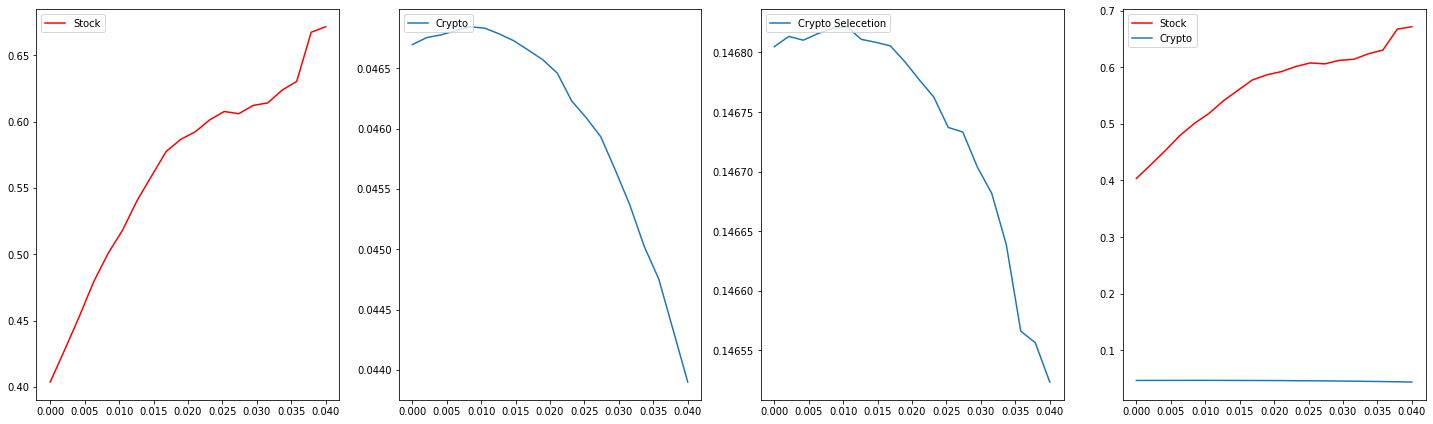

In [461]:
#@title 11.1.1
import matplotlib.ticker as mtick
from itertools import product

def rho_lambda(eta:pd.DataFrame, lambda_:float) -> float:
  eta_m = eta.mean(axis=1)
  indices = eta_m[eta_m.abs() > lambda_].index 
  N = int(eta.shape[1])
  nominator, denominator = 0, 0
  for i, j in product(range(N), range(N)): 
    nominator += np.nan_to_num(filter_indices(indices, eta.iloc[:,i] * eta.iloc[:,j]).mean()) \
     - filter_indices(indices, eta.iloc[:,i]).mean() \
     * filter_indices(indices, eta.iloc[:,j]).mean()
    if j == 0:
      denominator += filter_indices(indices, eta.iloc[:, i] * eta.iloc[:, i]).mean()\
       - (filter_indices(indices, eta.iloc[:, i]).mean())**2
  nominator /= N**2
  denominator /= N
  return nominator/denominator


lambdas = np.linspace(0,0.04,20)
rhos_stock = [rho_lambda(eta_stock, x) for x in lambdas]
rhos_crypto = [rho_lambda(eta_crypto, x) for x in lambdas]
rhos_crypto_selection = [rho_lambda(eta_crypto_selection, x) for x in lambdas]
#plt.figure(figsize=(8, 4), dpi=80)
#plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
#plt.plot(lambdas,  rhos_stock, label="Stock")
#plt.plot(lambdas,  rhos_crypto, label="Crypto")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
axes[0].plot(lambdas,  rhos_stock, label="Stock", color="r")
axes[0].legend(loc="upper left")
axes[1].plot(lambdas,  rhos_crypto, label="Crypto")
axes[1].legend(loc="upper left")
axes[2].plot(lambdas, rhos_crypto_selection, label="Crypto Selecetion")
axes[2].legend(loc="upper left")
axes[3].plot(lambdas,  rhos_stock, label="Stock", color="r")
axes[3].plot(lambdas,  rhos_crypto, label="Crypto")
axes[3].legend(loc="upper left")
fig.tight_layout()

#plt.legend()
#plt.show()

In [318]:
#@title One Factor Model

from sklearn import datasets, linear_model
import scipy
from typing import List

def get_betas(eta:pd.DataFrame) -> np.array:

  def con(betas:List) -> float:
    return sum(betas)/len(betas) - 1

  cons = {"type": "eq",  "fun": con}
  x0 = np.ones((eta.shape[1],1))
  eta_m = eta.mean(axis=1).to_numpy()
  eta_ = eta.to_numpy()
  
  def error(betas:List) -> float:
    betas = np.expand_dims(betas, axis=1)
    betas_ = np.repeat(betas, repeats=len(eta_m), axis=1).squeeze()
    error = np.absolute((eta_.T - betas_ * eta_m)).sum() 
    return error 

  res = scipy.optimize.minimize(error, x0, method='SLSQP', constraints=cons, options={'disp':True, 'maxiter': 1000})
  return res.x


def get_residuals(eta:pd.DataFrame, betas:np.array) -> pd.DataFrame:
  eta_m = eta.mean(axis=1).to_numpy()
  betas = np.expand_dims(betas, axis=1)
  betas_ = np.repeat(betas, repeats=len(eta_m), axis=1).squeeze()
  eta_ = eta.to_numpy()
  error = ((eta_.T - betas_ * eta_m)).T
  #print((error.T  + betas_ * eta_m).T)
  return pd.DataFrame(error)

betas_stock = get_betas(eta_stock)
eps_stock = get_residuals(eta_stock, betas_stock)
betas_crypto = get_betas(eta_crypto)
eps_crypto = get_residuals(eta_crypto, betas_crypto)
betas_crypto_selection = get_betas(eta_crypto_selection)
eps_crypto_selection = get_residuals(eta_crypto_selection, betas_crypto_selection)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 405.7994903455069
            Iterations: 81
            Function evaluations: 3885
            Gradient evaluations: 81
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1753.3166446614907
            Iterations: 132
            Function evaluations: 7786
            Gradient evaluations: 132
Optimization terminated successfully    (Exit mode 0)
            Current function value: 278.7537438882798
            Iterations: 16
            Function evaluations: 154
            Gradient evaluations: 16


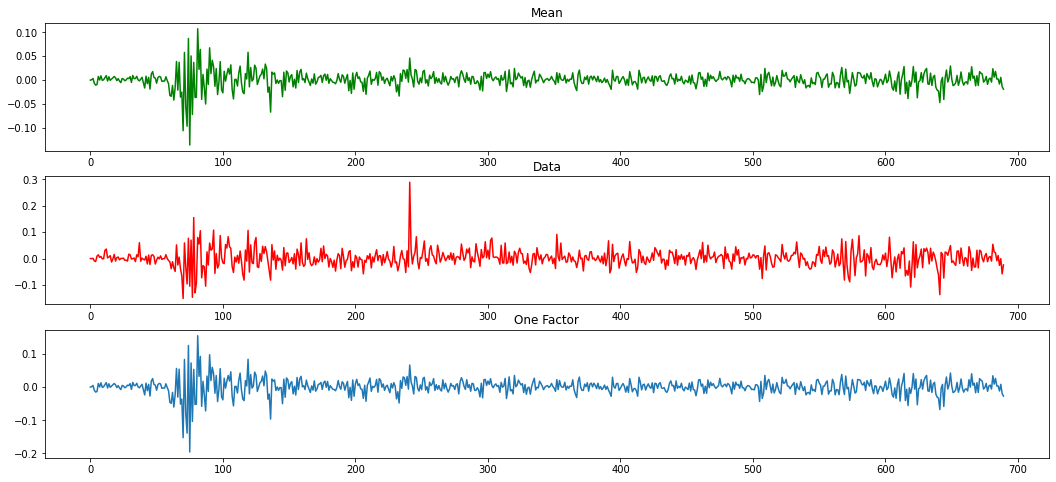

In [319]:
#@title Plot One Factor Model
def plot_one_factor(eta:pd.DataFrame, betas:np.array) -> None:
  eta_m = eta.mean(axis=1).to_numpy()
  betas = np.expand_dims(betas, axis=1)
  betas_ = np.repeat(betas, repeats=len(eta_m), axis=1).squeeze()
  eta_ = eta.to_numpy()
  y = betas_ * eta_m

  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 8))
  axes[2].plot(y[1,:], label="One Factor")
  axes[2].title.set_text("One Factor")
  axes[1].plot(eta.iloc[:,1], label="Data", color="r")
  axes[1].title.set_text("Data")
  axes[0].plot(eta_m[-1000:], label="Mean", color="g")
  axes[0].title.set_text("Mean")
plot_one_factor(eta_stock, betas_stock)

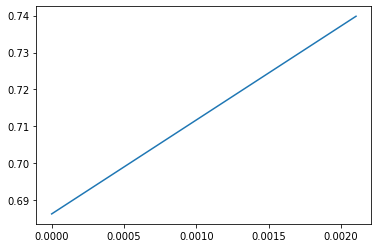

In [321]:
def rho_one_factor(lambda_:float, eta:pd.DataFrame, residuals:pd.DataFrame, betas) -> float:
  eta_ = eta.copy()
  eta_ = eta_[eta_ > lambda_].dropna()#.fillna(0)
  eta_m = eta_.mean(axis=1)

  sigma_m = eta_m.std()
  sigma_eps = residuals.std()
  N = len(betas)
  nominator = sigma_m**2
  denominator = 1/N *(sum(betas**2)) *sigma_m**2 + 1/N * (sum(sigma_eps**2))
  #print(denominator)
  #print(eta_)
  return nominator / denominator

lambdas = np.linspace(0,0.04,20)
rhos_stock = [rho_one_factor(x, eta_stock, eps_stock, betas_stock) for x in lambdas]
plt.plot(lambdas, rhos_stock)

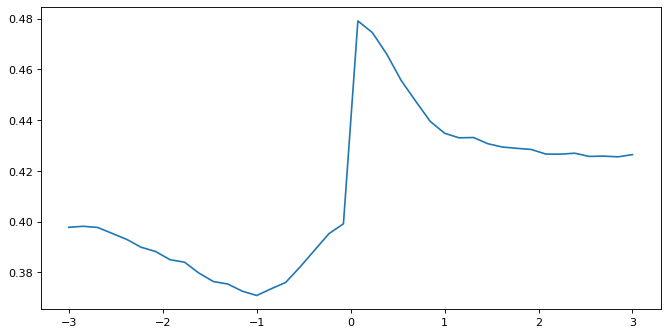

In [460]:
#@title 11.1.3
eta_tilde_crypto = scale_eta(eta_crypto)
eta_tilde_crypto_selection = scale_eta(eta_crypto_selection)
eta_tilde_stock = scale_eta(eta_stock).iloc[:, :]

def rho(eta_tilde:pd.DataFrame, theta:float) -> float:
  eta_tilde_ = eta_tilde.copy()
  eta_t_theta_na = eta_tilde_[eta_tilde_ < theta] if theta < 0 else eta_tilde_[eta_tilde_ > theta]
  #eta_t_theta = eta_tilde_[eta_tilde_ < theta].fillna(0) if theta < 0 else eta_tilde_[eta_tilde_ > theta].fillna(0)
  N = int(eta_tilde.shape[1])
  storage = np.zeros((N,N))
  for i, j in product(range(N), range(N)):
    eta_t_i = eta_t_theta_na.iloc[:, i]
    eta_t_j = eta_t_theta_na.iloc[:, j]
    eta_i_avg = eta_t_i.mean(skipna=True)
    eta_j_avg = eta_t_j.mean(skipna=True)
    #eta_i_avg = eta_t_theta.iloc[:, i].mean()
    #eta_j_avg = eta_t_theta.iloc[:, j].mean()
    eta_i_eta_j_avg = (eta_t_i * eta_t_j).mean(skipna=True)
    #eta_i_eta_j_avg = (eta_t_theta.iloc[:, i] * eta_t_theta.iloc[:, j]).mean()
    eta_i_sq_avg = (eta_t_i * eta_t_i).mean(skipna=True)
    eta_j_sq_avg = (eta_t_j * eta_t_j).mean(skipna=True)
    nominator = eta_i_eta_j_avg - eta_i_avg * eta_j_avg
    denominator = math.sqrt((eta_i_sq_avg - eta_i_avg ** 2) * (eta_j_sq_avg - eta_j_avg **2) * N)
    rho_ij = nominator / denominator
    storage[i,j] = rho_ij
  return storage.mean()

def rho2(eta_tilde:pd.DataFrame, theta:float) -> float:
  eta_tilde_ = eta_tilde.copy()
  eta_t_theta = eta_tilde_[eta_tilde_ < theta].fillna(0) if theta > 0 else eta_tilde_[eta_tilde_ > theta].fillna(0)
  rho = eta_t_theta.corr()
  return rho.mean().mean()

theta = np.linspace(-3, 3, 40)
#rho_crypto = [rho(eta_tilde_crypto, t) for t in theta]
rho_stock = [rho2(eta_tilde_stock, t) for t in theta]
#rho_crypto_selection =  [rho(eta_tilde_crypto_selection, t) for t in theta]
plt.figure(figsize=(10, 5), dpi=80)

#plt.plot(theta, rho_crypto, label="crypto")
#plt.plot(theta, rho_crypto_selection, label="crypto selection")
plt.plot(theta, rho_stock, label="stock")
#plt.legend()
#plt.show()
#rho(eta_tilde_stock, -4)

In [ ]:
#@title ...
#  eta_t_theta_av = 
#  #eta_t_theta1 = eta_tilde_[eta_tilde_ > theta].fillna(1) if theta > 0 else eta_tilde_[eta_tilde_ < theta].fillna(1)
#  #print(eta_t_theta)
#
#  rho_theta =  eta_t_theta.corr().to_numpy().mean()
#  return rho_theta#storage.mean()#rho_theta#storage.mean() #1-rho_thet
def positive_exceedance_correlation(i, j, theta):
  # Normalize the returns of i and j with zero mean and unit variance
  norm_i = (i - i.mean()) / i.std()
  norm_j = (j - j.mean()) / j.std()

  # Filter the normalized returns that are larger than theta
  if theta > 0:
    norm_i_filtered = norm_i[norm_i > theta]
    norm_j_filtered = norm_j[norm_j > theta]
  else:
    norm_i_filtered = norm_i[norm_i < theta]
    norm_j_filtered = norm_j[norm_j < theta]

  # Compute the average of the product of the filtered normalized returns
  avg_product = (norm_i_filtered * norm_j_filtered).mean()

  # Compute the average of the filtered first normalized return
  avg_i = norm_i_filtered.mean()

  # Compute the average of the filtered second normalized return
  avg_j = norm_j_filtered.mean()

  # Compute the average of the square of the filtered first normalized return
  avg_i_squared = (norm_i_filtered**2).mean()

  # Compute the average of the square of the filtered second normalized return
  avg_j_squared = (norm_j_filtered**2).mean()

  # Compute the numerator of the formula
  numerator = avg_product - avg_i * avg_j

  # Compute the denominator of the formula
  denominator = math.sqrt((avg_i_squared - avg_i**2) * (avg_j_squared - avg_j**2))

  # Compute and return the positive exceedance correlation
  return numerator / denominator

def rho(eta_tilde, theta):
  N = int(eta_tilde.shape[1])
  storage = np.zeros((N,N))
  for i, j in product(range(N), range(N)):
    eta_i = eta.iloc[:, i]
    eta_j = eta.iloc[:, j]
    rho_ij = positive_exceedance_correlation(eta_i, eta_j ,theta) 
    storage[i, j] = rho_ij
  return storage.mean()

rho(eta_stock, -1)

theta = np.linspace(-3, 3, 20)
rho_stock = [rho(eta_tilde_stock.iloc[:,:], t) for t in theta]
plt.figure(figsize=(10, 5), dpi=80)

#plt.plot(theta, rho_crypto, label="crypto")
#plt.plot(theta, rho_crypto_selection, label="crypto selection")
plt.plot(theta, rho_stock, label="stock")
plt.legend()
plt.show()

ef rho2(eta_tilde:pd.DataFrame, theta:float) -> float:
  eta_tilde_ = eta_tilde.copy()
  eta_t_theta = eta_tilde_[eta_tilde_ > theta].fillna(0) if theta > 0 else eta_tilde_[eta_tilde_ < theta].fillna(0)
  #nominator, denominator = 0, 0
  N = int(eta_tilde.shape[1])
  storage = np.zeros((N,N))
  for i, j in product(range(N), range(N)): 
    nominator = np.nan_to_num(filter_out_smaller_lambda(eta_tilde_.iloc[:,i]*eta_tilde_.iloc[:,j], theta).mean()) \
     - eta_t_theta.iloc[:,i].mean() \
     * eta_t_theta.iloc[:,j].mean()
    denominator = np.sqrt(
        abs(np.nan_to_num((filter_out_smaller_lambda(eta_tilde_.iloc[:, i]**2, theta).mean()) - np.nan_to_num(eta_t_theta.iloc[:,i].mean())**2) *\
        np.nan_to_num((filter_out_smaller_lambda(eta_tilde_.iloc[:, j]**2, theta).mean()) - np.nan_to_num(eta_t_theta.iloc[:,j].mean()**2)))
    )
    #print(denominator)
    storage[i,j] = nominator / denominator
  #rho_theta =  1 - eta_t_theta.corr().to_numpy().mean(
      
      def positive_exceedance_correlation(etai, etaj, theta):
    # Calculate the average of etai and etaj for values greater than theta
    mean_etai = np.mean(etai[etai > theta])
    mean_etaj = np.mean(etaj[etaj > theta])
    
    # Calculate the average of the product of etai and etaj for values greater than theta
    mean_etai_etaj = np.mean(etai[etai > theta] * etaj[etaj > theta])
    
    # Calculate the average of the square of etai for values greater than theta
    mean_etai_squared = np.mean(etai[etai > theta] ** 2)
    
    # Calculate the average of the square of etaj for values greater than theta
    mean_etaj_squared = np.mean(etaj[etaj > theta] ** 2)
    
    # Calculate the positive exceedance correlation
    rho = (mean_etai_etaj - mean_etai * mean_etaj) / np.sqrt((mean_etai_squared - mean_etai ** 2) * (mean_etaj_squared - mean_etaj ** 2))
    
    return rho
def positive_exceedance_correlation(eta_i, eta_j, theta):
    # Compute the average of eta_i and eta_j for values larger than theta
    avg_i = sum(eta_i[eta_i > theta]) / len(eta_i[eta_i > theta])
    avg_j = sum(eta_j[eta_j > theta]) / len(eta_j[eta_j > theta])
    
    # Compute the covariance and the variances of eta_i and eta_j for values larger than theta
    cov = sum((eta_i[eta_i > theta] - avg_i) * (eta_j[eta_j > theta] - avg_j)) / len(eta_i[eta_i > theta])
    var_i = sum((eta_i[eta_i > theta] - avg_i) ** 2) / len(eta_i[eta_i > theta])
    var_j = sum((eta_j[eta_j > theta] - avg_j) ** 2) / len(eta_j[eta_j > theta])
    
    # Compute and return the positive exceedance correlation
    return (cov - avg_i * avg_j) / math.sqrt(var_i * var_j)
def rho(eta_tilde:pd.DataFrame, theta:float) -> float:
    N = int(eta_tilde.shape[1])
    storage = np.zeros((N,N))
    for i, j in product(range(N), range(N)): 
      eta_tilde_i = eta_tilde.iloc[:, i]
      eta_tilde_j = eta_tilde.iloc[:, j]
      rho_ij = positive_exceedance_correlation(eta_tilde_i, eta_tilde_j, theta)
      storage[i, j] = rho_ij  
    return storage.mean()
      """
  N = int(eta_tilde.shape[1])
  storage = np.zeros((N,N))
  for i, j in product(range(N), range(N)): 
    eta_t_theta_i = eta_tilde_.iloc[:,i][eta_tilde_.iloc[:,i] > theta].dropna().to_numpy() if theta > 0 else eta_tilde_.iloc[:,i][eta_tilde_.iloc[:,i] < theta].dropna().to_numpy()
    eta_t_theta_j = eta_tilde_.iloc[:,j][eta_tilde_.iloc[:,j] > theta].dropna().to_numpy() if theta > 0 else eta_tilde_.iloc[:,j][eta_tilde_.iloc[:,i] < theta].dropna().to_numpy()
    K, L  = eta_t_theta_i.shape[0] ,eta_t_theta_j.shape[0] 
    avg = 0
    for k,l in product(range(K), range(L)):
      avg += eta_t_theta_i[k]*eta_t_theta_j[l]
    avg /= K*L
    nominator = avg \
     - eta_t_theta.iloc[:,i].mean() \
     * eta_t_theta.iloc[:,j].mean()
    denominator = np.sqrt(
        abs((eta_t_theta.iloc[:, i]**2).mean() - (eta_t_theta.iloc[:,i]).mean()**2 *\
        (eta_t_theta.iloc[:, j]**2).mean() - (eta_t_theta.iloc[:,j].mean())**2)
    )
    storage[i,j] = nominator / denominator"""
  #nominator, denominator = 0, 0
  """  N = int(eta_tilde.shape[1])
  storage = np.zeros((N,N))
  for i, j in product(range(N), range(N)): 
    nominator = (eta_t_theta1.iloc[:,i]*eta_t_theta1.iloc[:,j]).mean() \
     - eta_t_theta.iloc[:,i].mean() \
     * eta_t_theta.iloc[:,j].mean()
    denominator = np.sqrt(
        abs((eta_t_theta.iloc[:, i]**2).mean() - (eta_t_theta.iloc[:,i]).mean()**2 *\
        (eta_t_theta.iloc[:, j]**2).mean() - (eta_t_theta.iloc[:,j].mean())**2)
    )
    storage[i,j] = nominator / denominator"""
rho(eta_tilde_stock, 1)

def positive_exceedance_correlation(etai, etaj, theta):
    # Calculate the average of etai and etaj for values greater than theta
    mean_etai = np.mean(etai[etai > theta])
    mean_etaj = np.mean(etaj[etaj > theta])
    
    # Calculate the average of the product of etai and etaj for values greater than theta
    mean_etai_etaj = np.mean(etai[etai > theta] * etaj[etaj > theta])
    
    # Calculate the average of the square of etai for values greater than theta
    mean_etai_squared = np.mean(etai[etai > theta] ** 2)
    
    # Calculate the average of the square of etaj for values greater than theta
    mean_etaj_squared = np.mean(etaj[etaj > theta] ** 2)
    
    # Calculate the positive exceedance correlation
    rho = (mean_etai_etaj - mean_etai * mean_etaj) / np.sqrt((mean_etai_squared - mean_etai ** 2) * (mean_etaj_squared - mean_etaj ** 2))
    
    return rho
def positive_exceedance_correlation(eta_i, eta_j, theta):
    # Compute the average of eta_i and eta_j for values larger than theta
    avg_i = sum(eta_i[eta_i > theta]) / len(eta_i[eta_i > theta])
    avg_j = sum(eta_j[eta_j > theta]) / len(eta_j[eta_j > theta])
    
    # Compute the covariance and the variances of eta_i and eta_j for values larger than theta
    cov = sum((eta_i[eta_i > theta] - avg_i) * (eta_j[eta_j > theta] - avg_j)) / len(eta_i[eta_i > theta])
    var_i = sum((eta_i[eta_i > theta] - avg_i) ** 2) / len(eta_i[eta_i > theta])
    var_j = sum((eta_j[eta_j > theta] - avg_j) ** 2) / len(eta_j[eta_j > theta])
    
    # Compute and return the positive exceedance correlation
    return (cov - avg_i * avg_j) / math.sqrt(var_i * var_j)
def rho(eta_tilde:pd.DataFrame, theta:float) -> float:
    N = int(eta_tilde.shape[1])
    storage = np.zeros((N,N))
    for i, j in product(range(N), range(N)): 
      eta_tilde_i = eta_tilde.iloc[:, i]
      eta_tilde_j = eta_tilde.iloc[:, j]
      rho_ij = positive_exceedance_correlation(eta_tilde_i, eta_tilde_j, theta)
      storage[i, j] = rho_ij  
    return storage.mean()
      """
  N = int(eta_tilde.shape[1])
  storage = np.zeros((N,N))
  for i, j in product(range(N), range(N)): 
    eta_t_theta_i = eta_tilde_.iloc[:,i][eta_tilde_.iloc[:,i] > theta].dropna().to_numpy() if theta > 0 else eta_tilde_.iloc[:,i][eta_tilde_.iloc[:,i] < theta].dropna().to_numpy()
    eta_t_theta_j = eta_tilde_.iloc[:,j][eta_tilde_.iloc[:,j] > theta].dropna().to_numpy() if theta > 0 else eta_tilde_.iloc[:,j][eta_tilde_.iloc[:,i] < theta].dropna().to_numpy()
    K, L  = eta_t_theta_i.shape[0] ,eta_t_theta_j.shape[0] 
    avg = 0
    for k,l in product(range(K), range(L)):
      avg += eta_t_theta_i[k]*eta_t_theta_j[l]
    avg /= K*L
    nominator = avg \
     - eta_t_theta.iloc[:,i].mean() \
     * eta_t_theta.iloc[:,j].mean()
    denominator = np.sqrt(
        abs((eta_t_theta.iloc[:, i]**2).mean() - (eta_t_theta.iloc[:,i]).mean()**2 *\
        (eta_t_theta.iloc[:, j]**2).mean() - (eta_t_theta.iloc[:,j].mean())**2)
    )
    storage[i,j] = nominator / denominator"""
  #nominator, denominator = 0, 0
  """  N = int(eta_tilde.shape[1])
  storage = np.zeros((N,N))
  for i, j in product(range(N), range(N)): 
    nominator = (eta_t_theta1.iloc[:,i]*eta_t_theta1.iloc[:,j]).mean() \
     - eta_t_theta.iloc[:,i].mean() \
     * eta_t_theta.iloc[:,j].mean()
    denominator = np.sqrt(
        abs((eta_t_theta.iloc[:, i]**2).mean() - (eta_t_theta.iloc[:,i]).mean()**2 *\
        (eta_t_theta.iloc[:, j]**2).mean() - (eta_t_theta.iloc[:,j].mean())**2)
    )
    storage[i,j] = nominator / denominator"""
rho(eta_tilde_stock, 1)

#eta = 1- stat.ratio #-1
#eta = 1 - ratio(stat.X)
#eta.plot()
#eta.corr()
eta=eta_stock.iloc[:1000, :]
scaler.fit(eta)
eta_tilde = scaler.transform(eta)
eta_tilde = pd.DataFrame(eta_tilde)
corr = eta_tilde.corr()
theta = 8
eta_t_theta = eta_tilde[eta_tilde > theta].fillna(0)
#eta_t_theta 
rho_theta = eta_t_theta.corr()
#print(rho_theta.mean().mean())

def rho(theta:float) -> float:

  eta_t_theta = eta_tilde[eta_tilde > theta].fillna(0) if theta > 0 else eta_tilde[eta_tilde < theta].fillna(0)
  rho_theta = 1-eta_t_theta.corr()
  return rho_theta.to_numpy().mean()
theta = np.linspace(-3, 3, 50)
vals = [rho(thet) for thet in theta]
plt.plot(theta, vals)

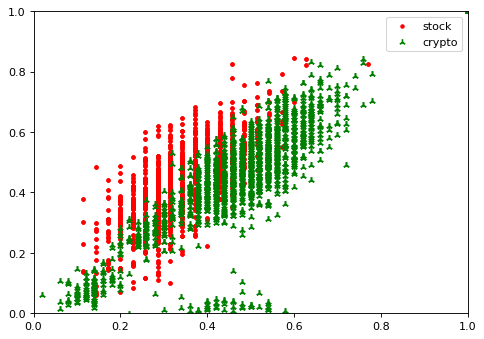

In [328]:
#@title 11.1.4
in_tail_stock = eta_stock < eta_stock.quantile(q=0.05)
probs_stock = pd.concat([in_tail_stock[in_tail_stock[col]==True].mean() 
                   for col in in_tail_stock], axis=1)
probs_stock.columns = probs_stock.index

in_tail_crypto = eta_crypto< eta_crypto.quantile(q=0.05)
probs_crypto= pd.concat([in_tail_crypto[in_tail_crypto[col]==True].mean()
                   for col in in_tail_crypto], axis=1)
probs_crypto.columns = probs_crypto.index


plt.figure(figsize=(7, 5), dpi=80)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.scatter(probs_stock.iloc[:,:], eta_stock.corr().iloc[:,:], marker=".", color="r", label="stock")
plt.scatter(probs_crypto.iloc[:,:], eta_crypto.corr().iloc[:,:], marker="2", color="g", label="crypto")
plt.legend()
plt.show()


In [329]:
#@title 11.2 Variety
def variety(eta:pd.DataFrame) -> pd.DataFrame:
  """ Returns DataFrame with columns [average_return, variety] """
  eta_out = pd.DataFrame()
  eta_out["average_return"] = eta.mean(axis=1)
  eta_out["variety"] = eta.std(axis=1) #1/sqrt(M)
  eta_out["average_return"] = pd.Series(["{0:.2f}%".format(val * 100) for val in eta_out["average_return"]], index = eta_out.index)
  eta_out["variety"] = pd.Series(["{0:.2f}%".format(val * 100) for val in eta_out["variety"]], index = eta_out.index)  
  return eta_out 
variety(eta_stock) 

,average_return,variety
0,0.00%,0.00%
1,0.08%,1.33%
2,0.35%,0.84%
3,-0.66%,0.75%
4,-1.04%,2.07%
...,...,...
685,0.23%,1.16%
686,-0.82%,1.40%
687,0.57%,1.75%
688,-1.32%,1.40%


Text(0.5, 1.0, 'Crypto Selection')

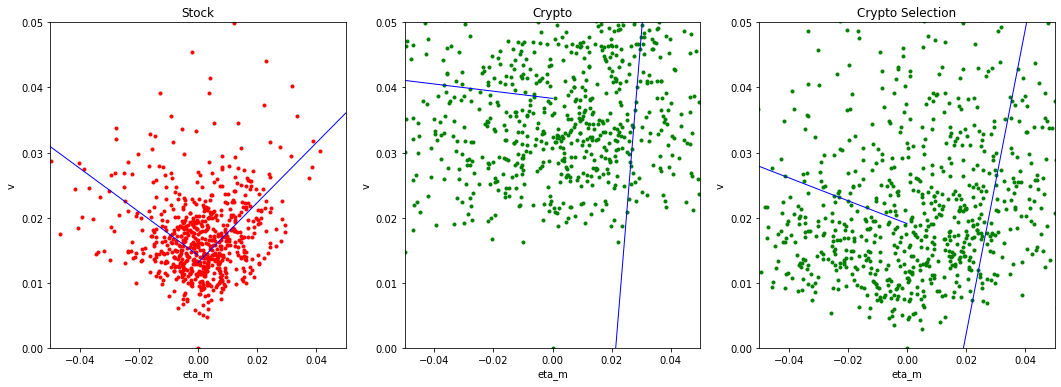

In [470]:
#@title 11.2.2 & 11.2.3

variety_stock = (1/ eps_stock.shape[1] * (eps_stock**2).sum(axis=1)).pow(1./2)
variety_crypto = (1/ eps_crypto.shape[1] * (eps_crypto**2).sum(axis=1)).pow(1./2)
variety_crypto_selection = (1/ eps_crypto_selection.shape[1] * (eps_crypto_selection**2).sum(axis=1)).pow(1./2)

eta_m_stock = eta_stock.mean(axis=1)
eta_m_crypto = eta_crypto.mean(axis=1) 
eta_m_crypto_selection = eta_crypto_selection.mean(axis=1) 

from sklearn.linear_model import LinearRegression
#eta_m_stock_pos

def reg_pos_neg(eta_m, variety):
  eta_m_pos = eta_m[eta_m >= 0].values
  eta_m_neg = eta_m[eta_m < 0].values
  variety_pos = variety[eta_m >= 0].values
  variety_neg = variety[eta_m < 0].values

  regr_pos = linear_model.LinearRegression(fit_intercept=True)
  regr_neg = linear_model.LinearRegression(fit_intercept=True)
  eta_m_pos = eta_m_pos.reshape(len(eta_m_pos), 1)
  eta_m_neg = eta_m_neg.reshape(len(eta_m_neg), 1)
  x_pos = variety_pos.reshape(len(variety_pos), 1)
  x_neg = variety_neg.reshape(len(variety_neg), 1)
  regr_pos.fit(eta_m_pos, x_pos)
  regr_neg.fit(eta_m_neg, x_neg)
  return regr_pos, regr_neg

ran_pos = np.linspace(0, 0.05, 20).reshape((20, 1))
ran_neg = np.linspace(0, -0.05, 20).reshape((20, 1))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
regr_pos, regr_neg = reg_pos_neg(eta_m_stock, variety_stock)
axes[0].scatter(eta_m_stock, variety_stock, marker=".", color="r")
axes[0].plot(ran_pos, regr_pos.predict(ran_pos), color='blue', linewidth=1)
axes[0].plot(ran_neg, regr_neg.predict(ran_neg), color='b', linewidth=1)
#axes[0].legend(loc="upper left")
axes[0].set_xlim(-0.05, 0.05)
axes[0].set_ylim(0, 0.05)
axes[0].set_xlabel("eta_m")
axes[0].set_ylabel("v")
axes[0].set_title("Stock")

regr_pos, regr_neg = reg_pos_neg(eta_m_crypto, variety_crypto)
axes[1].scatter(eta_m_crypto, variety_crypto, marker=".", color="g")
axes[1].plot(ran_pos, regr_pos.predict(ran_pos), color='blue', linewidth=1)
axes[1].plot(ran_neg, regr_neg.predict(ran_neg), color='b', linewidth=1)
#axes[1].legend(loc="upper left")
axes[1].set_xlim(-0.05, 0.05)
axes[1].set_ylim(0, 0.05)
axes[1].set_xlabel("eta_m")
axes[1].set_ylabel("v")
axes[1].set_title("Crypto")

regr_pos, regr_neg = reg_pos_neg(eta_m_crypto_selection, variety_crypto_selection)
axes[2].scatter(eta_m_crypto_selection, variety_crypto_selection, marker=".", color="g")
axes[2].plot(ran_pos, regr_pos.predict(ran_pos), color='blue', linewidth=1)
axes[2].plot(ran_neg, regr_neg.predict(ran_neg), color='b', linewidth=1)
#axes[1].legend(loc="upper left")
axes[2].set_xlim(-0.05, 0.05)
axes[2].set_ylim(0, 0.05)
axes[2].set_xlabel("eta_m")
axes[2].set_ylabel("v")
axes[2].set_title("Crypto Selection")

In [474]:
print(variety_crypto[variety_crypto > 1])
print(variety_stock[variety_stock > 1])

51    8.225744
dtype: float64
Series([], dtype: float64)


Text(0.5, 1.0, 'Crypto')

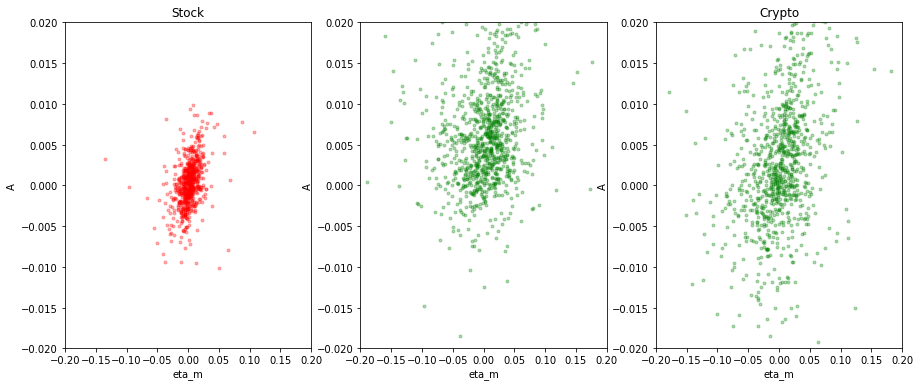

In [340]:
#@title 11.2.4 Conditional Skewness

eta_m_stock = eta_stock.mean(axis=1)
eta_m_crypto = eta_crypto.mean(axis=1)
eta_m_crypto_selection = eta_crypto_selection.mean(axis=1)

def asymmetry(eta:pd.DataFrame) -> pd.Series:
  eta_m = eta.mean(axis=1)
  eta_median = eta.median(axis=1)
  return eta_m - eta_median

#plt.scatter(eta_m_stock, asymmetry(eta_stock))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
axes[0].scatter(eta_m_stock, asymmetry(eta_stock),  marker=".", color="r", alpha=0.3)
axes[0].set_xlim(-0.2, 0.2)
axes[0].set_ylim(-0.02, 0.02)
axes[0].set_xlabel("eta_m")
axes[0].set_ylabel("A")
axes[0].set_title("Stock")
axes[1].scatter(eta_m_crypto, asymmetry(eta_crypto),  marker=".", color="g", alpha=0.3)
axes[1].set_xlim(-0.2, 0.2)
axes[1].set_ylim(-0.02, 0.02)
axes[1].set_xlabel("eta_m")
axes[1].set_ylabel("A")
axes[2].set_title("Crypto Selection")
axes[2].scatter(eta_m_crypto_selection, asymmetry(eta_crypto_selection),  marker=".", color="g", alpha=0.3)
axes[2].set_xlim(-0.2, 0.2)
axes[2].set_ylim(-0.02, 0.02)
axes[2].set_xlabel("eta_m")
axes[2].set_ylabel("A")
axes[2].set_title("Crypto")#asymmetry(eta_stock)